Liliana Djaja Witama\
2702219774

# UAS Deep Learning
## No 1 - Dataset AP003
**Link video:** https://drive.google.com/file/d/11RQ48D-P5es3sQbO5Nw1M2ajMMA-mSvC/view?usp=sharing

## import libraries

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder, OrdinalEncoder
from scipy.stats import shapiro
import pickle
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import LSTM, Dense, Dropout

import random
SEED_VALUE=42
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)

## import dataset

In [97]:
url = 'https://drive.google.com/uc?id=1NJdqsaI2JptPN4y2sTUvyFYtltQuPb6Q'
df = pd.read_csv(url)
df.head()

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3),Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)
0,2017-07-01 00:00:00,2017-07-01 01:00:00,50.00,91.75,3.33,27.70,17.48,NaN,24.35,1.33,NaN,0.58,0.75,55.22,83.25,1.67,285.50,6.75,737.0,0.03,26.30,0.00,0.65
1,2017-07-01 01:00:00,2017-07-01 02:00:00,30.75,59.25,1.20,20.78,11.40,0.03,8.23,1.77,NaN,0.45,0.33,57.48,84.50,2.50,299.50,6.75,736.0,0.05,25.00,1.50,0.50
2,2017-07-01 02:00:00,2017-07-01 03:00:00,NaN,NaN,1.17,4.07,2.73,0.10,10.77,1.20,NaN,0.53,0.47,58.67,86.00,0.77,285.67,6.67,736.0,0.03,24.17,0.33,0.43
3,2017-07-01 03:00:00,2017-07-01 04:00:00,8.00,NaN,2.58,6.38,5.30,NaN,19.78,1.58,144.42,0.75,0.48,58.93,86.00,1.55,302.50,6.00,735.0,0.08,24.10,0.00,0.63
4,2017-07-01 04:00:00,2017-07-01 05:00:00,33.25,NaN,5.30,21.03,15.47,0.15,22.40,2.25,42.65,0.78,1.00,59.88,86.00,2.30,297.25,6.00,735.0,0.08,24.90,0.00,0.67


## EDA

### umum

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50400 entries, 0 to 50399
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   From Date        50400 non-null  object 
 1   To Date          50400 non-null  object 
 2   PM2.5 (ug/m3)    44691 non-null  float64
 3   PM10 (ug/m3)     45018 non-null  float64
 4   NO (ug/m3)       46252 non-null  float64
 5   NO2 (ug/m3)      45705 non-null  float64
 6   NOx (ppb)        47040 non-null  float64
 7   NH3 (ug/m3)      45756 non-null  float64
 8   SO2 (ug/m3)      43604 non-null  float64
 9   CO (mg/m3)       46993 non-null  float64
 10  Ozone (ug/m3)    45309 non-null  float64
 11  Benzene (ug/m3)  46678 non-null  float64
 12  Toluene (ug/m3)  46678 non-null  float64
 13  Temp (degree C)  46335 non-null  float64
 14  RH (%)           46520 non-null  float64
 15  WS (m/s)         46522 non-null  float64
 16  WD (degree)      44710 non-null  float64
 17  SR (W/mt2)  

melihat informasi dataset untuk mengetahui jumlah baris dan kolom serta variabel apa saja yang terdapat dalam dataset. Terdapat 50400 baris dan 23 kolom dalam dataset ini. Semua variabel kecuali 'From Date' dan 'To Date' adalah variabel numerik.

In [99]:
df.duplicated().sum()

np.int64(0)

tidak ada duplicated values dalam dataset ini

In [100]:
df.isna().sum()

,0
From Date,0
To Date,0
PM2.5 (ug/m3),5709
PM10 (ug/m3),5382
NO (ug/m3),4148
NO2 (ug/m3),4695
NOx (ppb),3360
NH3 (ug/m3),4644
SO2 (ug/m3),6796
CO (mg/m3),3407


terdapat null values dalam variabel-variabel numerik

In [101]:
num_cols = ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)',
       'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)',
       'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)',
       'Temp (degree C)', 'RH (%)', 'WS (m/s)', 'WD (degree)', 'SR (W/mt2)',
       'BP (mmHg)', 'VWS (m/s)', 'AT (degree C)', 'RF (mm)', 'Xylene (ug/m3)']

### ubah format date

In [103]:
df['From Date'] = pd.to_datetime(df['From Date'])
df['To Date'] = pd.to_datetime(df['To Date'])

In [104]:
#jadikan index
df.set_index('From Date', inplace=True)

### cek jarak value 'From Date'

In [ ]:
time_diff = df.index.to_series().diff().dropna()
print("\nSelisih waktu antara setiap baris:\n", time_diff.value_counts().sort_index())

if time_diff.nunique() == 1:
    print(f"\nInterval waktu: {time_diff.iloc[0]}")
else:
    print("\nInterval waktu TIDAK seragam. Ada beberapa interval yang berbeda.")
    print("Interval waktu yang paling sering muncul:", time_diff.mode()[0])


Selisih waktu antara setiap baris:
 From Date
0 days 01:00:00    50399
Name: count, dtype: int64

Interval waktu: 0 days 01:00:00


di sini saya mengecek konsistensi interval waktu pada data time series yang indeksnya berupa timestamp (DatetimeIndex). selisihnya seragam -> 1 jam.

### visualisasi time series

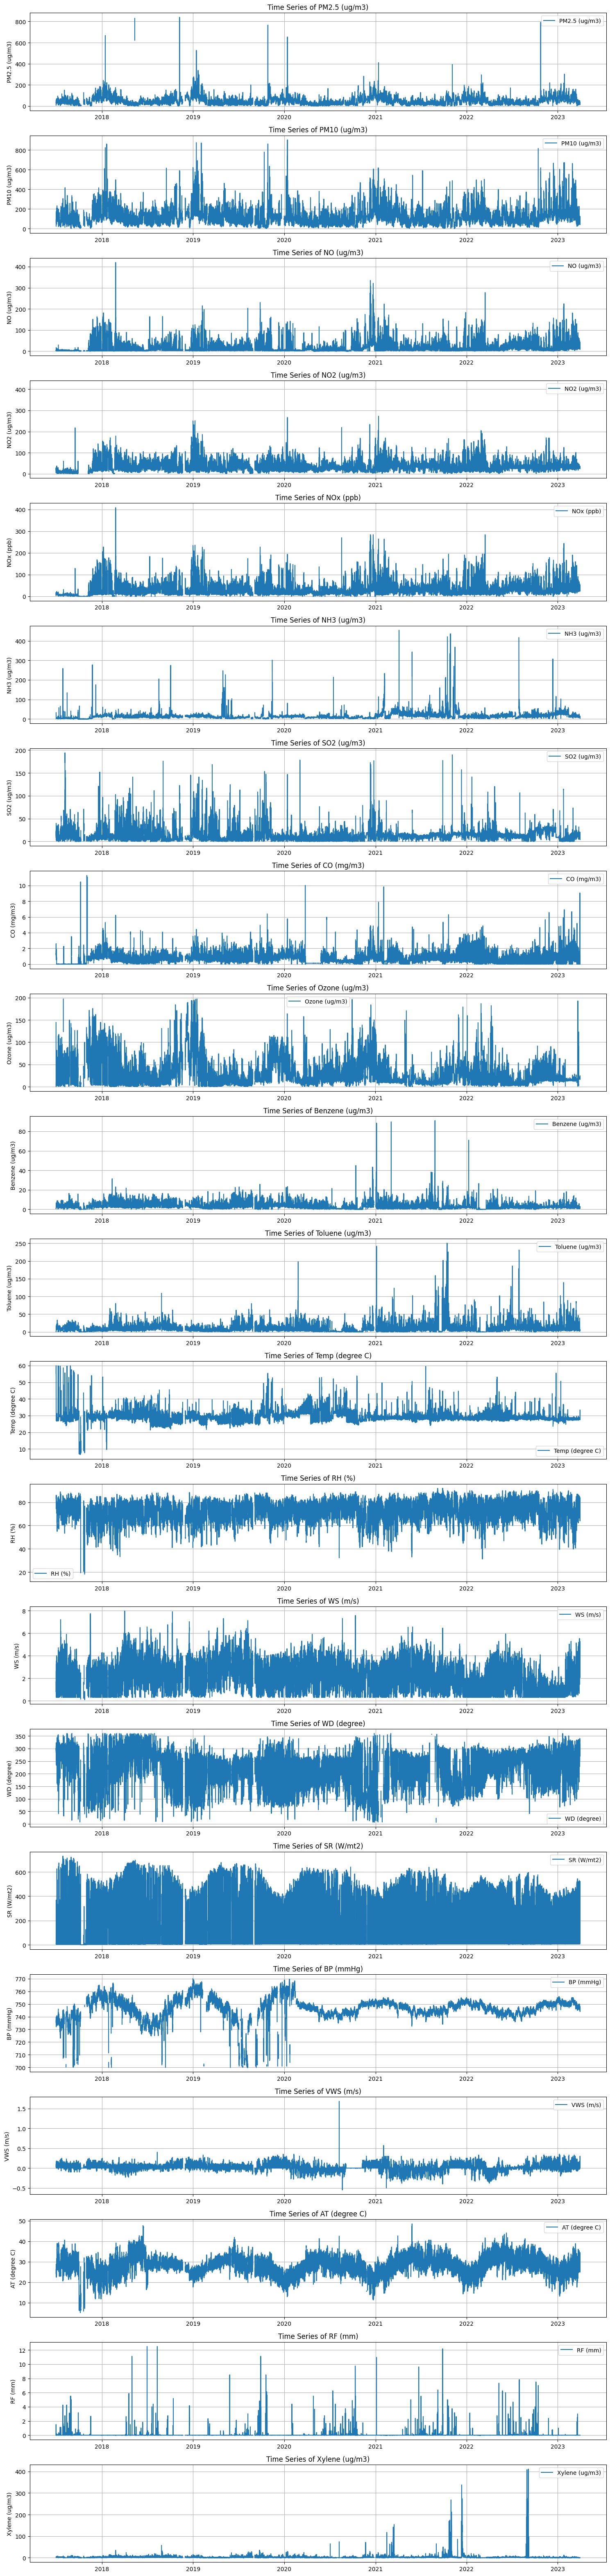

In [ ]:
fig_height = len(num_cols) * 3
plt.figure(figsize=(15, fig_height))

for i, var in enumerate(num_cols):
    plt.subplot(len(num_cols), 1, i + 1)
    plt.plot(df.index, df[var], label=var)
    plt.title(f'Time Series of {var}')
    plt.ylabel(var)
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

Visualisasi time series dilakukan untuk melihat tren dan pola pada setiap variabelnya.

Hampir semua variabel menunjukkan variablititas yang tinggi dari waktu ke waktu. Misalnya pada variabel seperti PM2.5, PM10, NO, terlihat memiliki fluktuasi ekstrem berupa lonjakan yang tajam dan signifikan.

Karena null values masih belum dibersihkan, masih terlihat beberapa pola pada grafik yang hilang.

Variabel target ('AT') menunjukkan pola yang berulang di setiap tahunnya. Hal ini kemungkinan menunjukkan pola musiman.

#### Interpretasi per variabel
**PM2.5 (µg/m³)**
- Beberapa lonjakan ekstrem >600 µg/m³.
- Pola fluktuatif, cenderung meningkat saat 2019–2020.
- Indikasi adanya event polusi besar (asap, kebakaran).

**PM10 (µg/m³)**
- Pola mirip PM2.5, tapi lebih banyak lonjakan besar.
- Musim tertentu menunjukkan peningkatan tajam.
- Cenderung tinggi saat musim kemarau atau kebakaran.

**NO (µg/m³)**
- Tinggi pada awal 2017–2019, menurun setelah 2020.
- Konsentrasi cukup fluktuatif tapi menurun setelah pandemi.
- Kemungkinan terkait emisi kendaraan.

**NO2 (µg/m³)**
- Pola serupa NO, tapi lebih halus dan tidak se-ekstrem.
- Penurunan signifikan setelah 2020 → indikasi lockdown atau pembatasan transportasi.

**NOx (ppb)**
- Gabungan dari NO dan NO2 → terlihat konsisten dengan keduanya.
- Pola penurunan terlihat pasca-2020.

**NH3 (µg/m³)**
- Fluktuatif dengan lonjakan tinggi pada 2021–2022.
- Indikasi aktivitas industri/agro yang tidak stabil.

**SO2 (µg/m³)**
- Sering melonjak, paling aktif sebelum 2020.
- Setelah 2020, jauh lebih stabil → indikasi regulasi atau penurunan aktivitas industri.

**CO (mg/m³)**
- Awalnya fluktuatif, tapi relatif stabil dari 2019–2022.
- Lonjakan jarang, ada peningkatan ringan menjelang 2023.

**Ozone (µg/m³)**
- Pola musiman kuat: naik turun secara periodik tiap tahun.
- Indikasi kuat terhadap efek musim dan sinar matahari.

**Benzene (µg/m³)**
- Tren meningkat perlahan sejak 2017.
- Beberapa spike tajam → kemungkinan kebocoran industri atau kecelakaan lokal.

**Toluene (µg/m³)**
- Fluktuatif, banyak spike sejak 2021.
- Pola tidak menentu, bisa jadi data tidak lengkap atau proses industri berubah.

**Temp (C)**
- Pola musiman jelas (berulang setiap tahun).
- Fluktuasi wajar sesuai siklus tahunan.

**RH (R %)**
- Stabil, namun ada noise/titik ekstrem di awal.
- Cenderung tinggi, konsisten sepanjang tahun.

**WS (m/s)**
- Stabil sepanjang tahun, fluktuasi kecil.
- Tidak ada pola ekstrem.

**WD (degree)**
- Variabel sepanjang tahun, banyak fluktuasi.
- Normal karena angin bisa dari segala arah.

**SR (W/m²)**
- Pola musiman sangat kuat, hilang pada musim hujan.
- Ada banyak NA atau flat 0 → mungkin malam hari tidak difilter.

**BP**
- Ada fluktuasi perlahan, tidak terlalu tajam.
- Terlihat ada pola musiman halus, dengan sedikit naik-turun dalam periode tahunan.
- Konsisten sepanjang tahun.

**VWS (m/s)**
- Fluktuasi kecil dan stabil sepanjang waktu.
- Tidak ada tren yang mencolok atau musiman kuat.
- Variabilitas sedikit meningkat sejak 2021.

**AT (C)**
- Pola musiman yang sangat jelas (siklus tahunan).
- Terdapat variasi suhu harian yang wajar.
- Puncak-puncak suhu cenderung lebih tinggi sekitar pertengahan tahun (musim panas).
- Tidak ada tren naik signifikan, cukup stabil dari tahun ke tahun.

**RF (mm)**
- Pola sporadis, tidak konsisten tiap tahun.
- Periode panjang tanpa curah hujan → kemungkinan NA atau kemarau panjang.

**Xylene (µg/m³)**
- Sangat rendah hampir sepanjang tahun.
- Spike besar muncul setelah 2021 → indikasi aktivitas baru atau kegagalan alat.

### cek distribusi dan outlier

In [110]:
pd.set_option('display.max_columns', None)
display(df[num_cols].describe())

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3),Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)
count,44691.000000,45018.000000,46252.000000,45705.000000,47040.000000,45756.000000,43604.000000,46993.000000,45309.000000,46678.000000,46678.000000,46335.000000,46520.000000,46522.000000,44710.000000,47045.000000,43680.000000,47043.000000,46370.000000,47148.000000,46658.000000
mean,46.869591,111.938589,14.817678,34.921808,29.857413,13.813287,12.323789,0.666865,29.118732,3.309707,9.897485,29.408316,73.166650,1.895205,209.078558,127.619004,746.903387,0.017120,27.591552,0.022934,2.649006
std,35.201161,74.285923,22.372042,23.912796,27.042412,14.685377,10.266289,0.550187,29.388645,2.926522,11.164764,3.228845,8.592562,1.199727,67.168061,175.790733,7.656193,0.071902,4.426638,0.282441,8.785483
min,0.250000,1.000000,0.030000,0.030000,0.000000,0.020000,0.030000,0.000000,0.100000,0.000000,0.000000,6.700000,15.750000,0.100000,7.000000,0.000000,700.000000,-0.550000,5.180000,0.000000,0.000000
25%,23.415000,63.330000,2.915000,18.400000,12.670000,7.050000,6.350000,0.330000,9.930000,1.500000,3.750000,27.900000,68.000000,0.880000,157.250000,6.250000,743.000000,0.000000,24.830000,0.000000,0.570000
50%,38.750000,97.750000,6.600000,30.300000,22.910000,11.600000,10.680000,0.590000,17.570000,2.700000,7.250000,28.850000,74.330000,1.800000,220.000000,8.250000,747.500000,0.000000,27.650000,0.000000,1.300000
75%,62.330000,137.500000,17.300000,43.900000,36.930000,16.770000,15.520000,0.890000,37.680000,4.380000,12.520000,30.180000,79.670000,2.730000,262.670000,227.500000,751.000000,0.050000,30.400000,0.000000,2.770000
max,840.000000,904.000000,419.780000,420.200000,408.250000,454.900000,194.250000,11.280000,199.300000,91.000000,250.550000,59.880000,92.000000,7.970000,360.000000,730.000000,770.000000,1.680000,48.500000,12.500000,410.850000


Dengan melihat description variabel numerik, kita bisa mendeteksi beberapa anomali. Hampir semua variabel memiliki anomali yang paling mencolok berupa outlier jika dilihat berdasarkan nilai Max yang sangat tinggi dibandingkan dengan Q3 dan IQR.

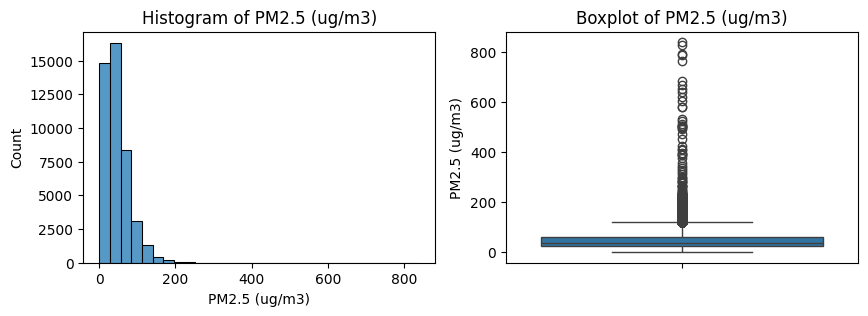

skewness: 3.8120308404033265
kurtosis: 48.48340018970142


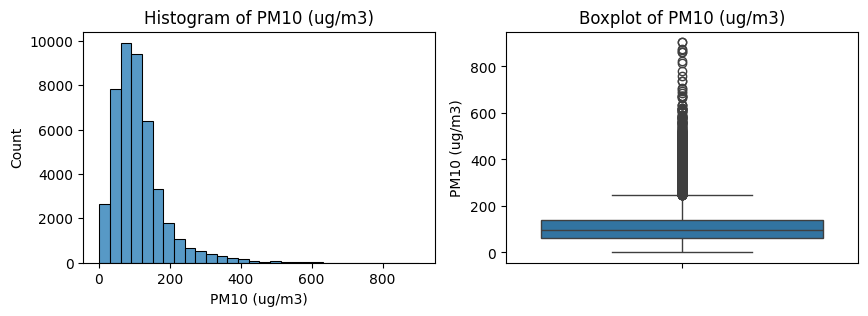

skewness: 2.1486766161738498
kurtosis: 8.227009584889002


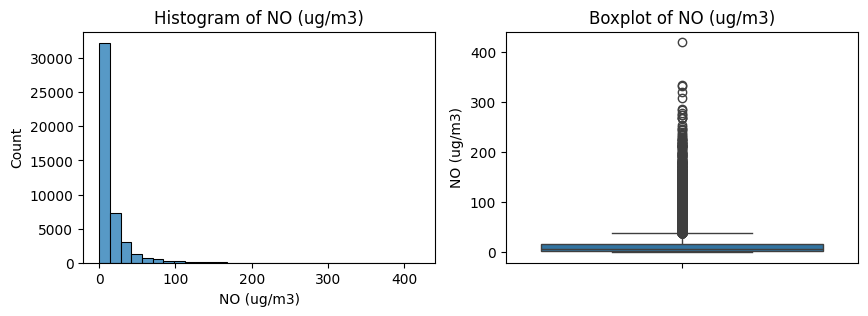

skewness: 4.012152541960519
kurtosis: 25.31812501114471


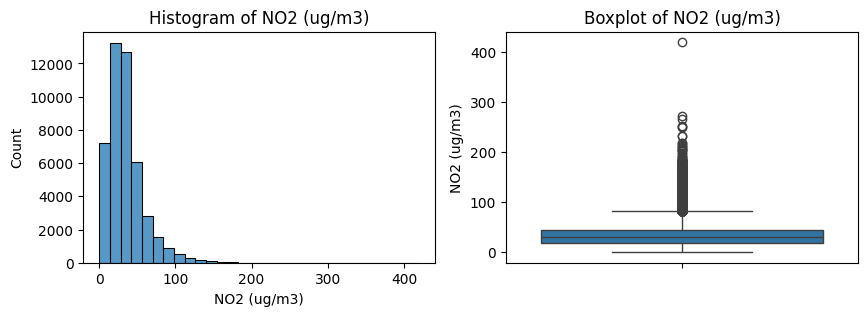

skewness: 1.927265504801719
kurtosis: 7.248969095628038


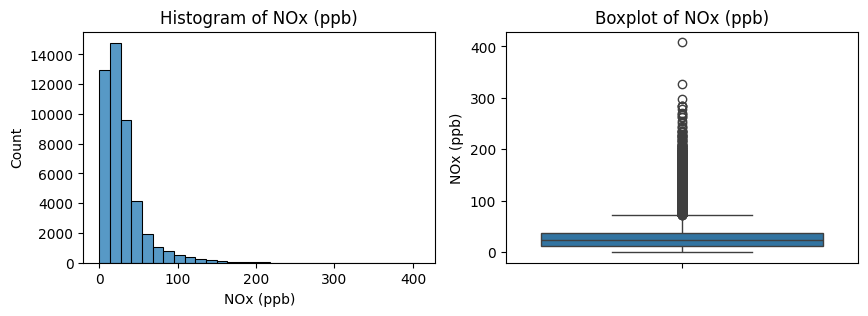

skewness: 2.5908837540692913
kurtosis: 10.443009518551188


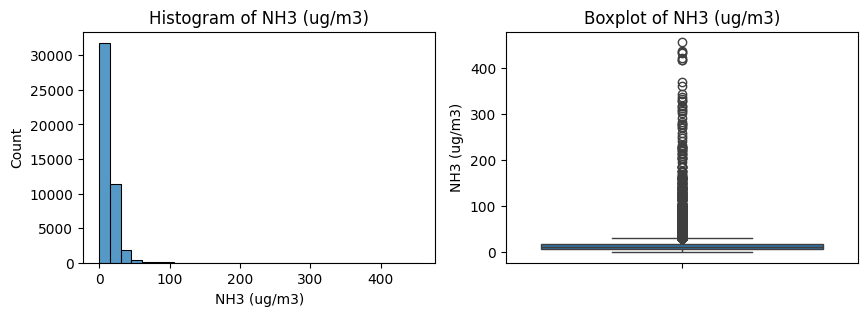

skewness: 10.591016268361521
kurtosis: 208.4797057356495


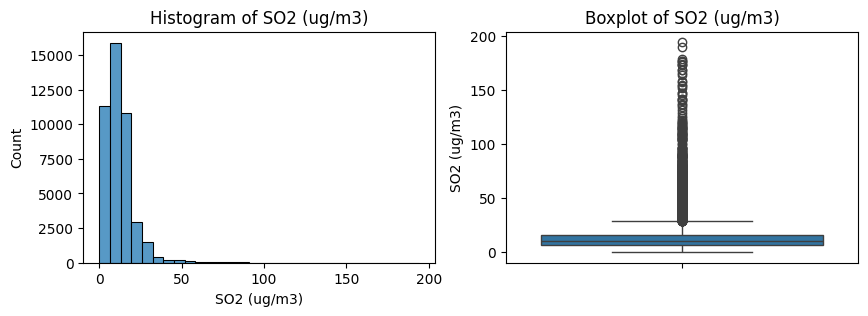

skewness: 4.648163051137525
kurtosis: 45.213892212912924


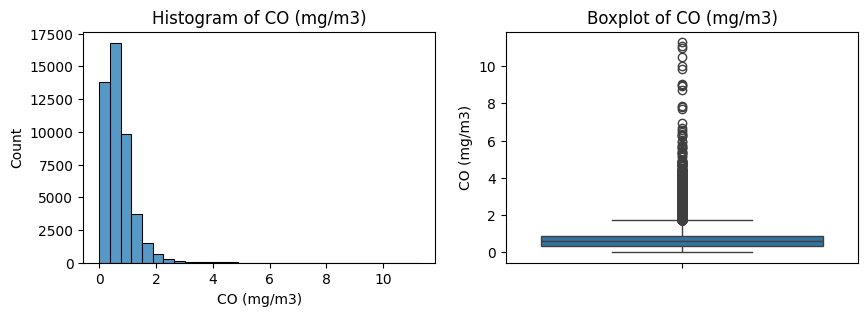

skewness: 3.086232178353527
kurtosis: 28.728343935521593


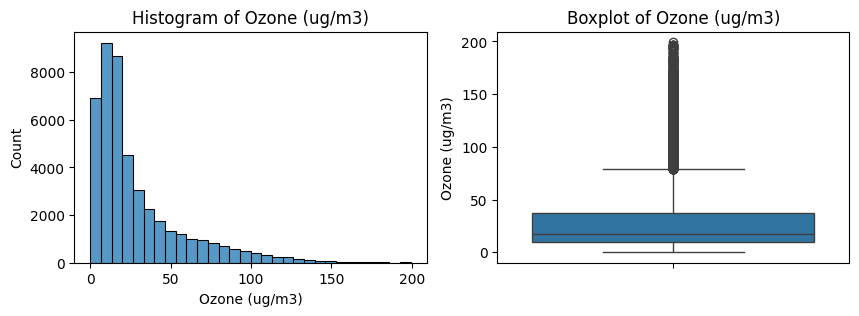

skewness: 1.8824009979882446
kurtosis: 3.7433378247036684


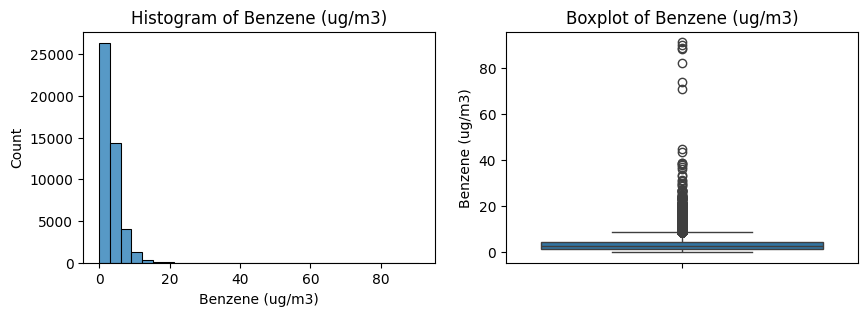

skewness: 5.031570891167827
kurtosis: 97.29771288713901


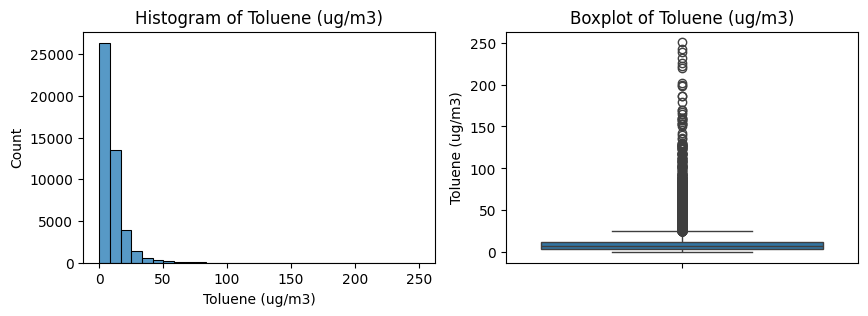

skewness: 5.3228497794262015
kurtosis: 59.384152198403164


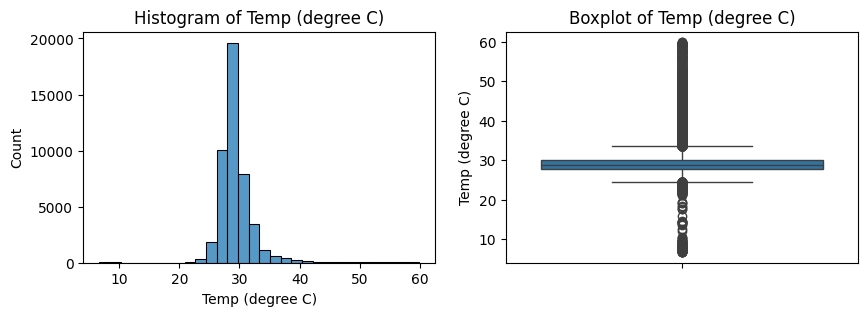

skewness: 2.8674251310339836
kurtosis: 22.39783007499976


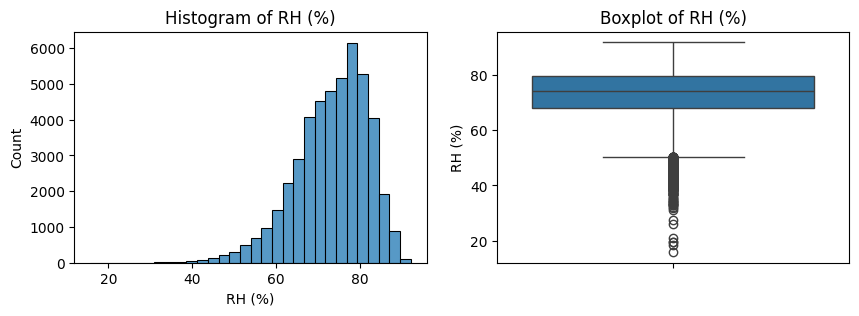

skewness: -0.7675688099948292
kurtosis: 0.7524505862734299


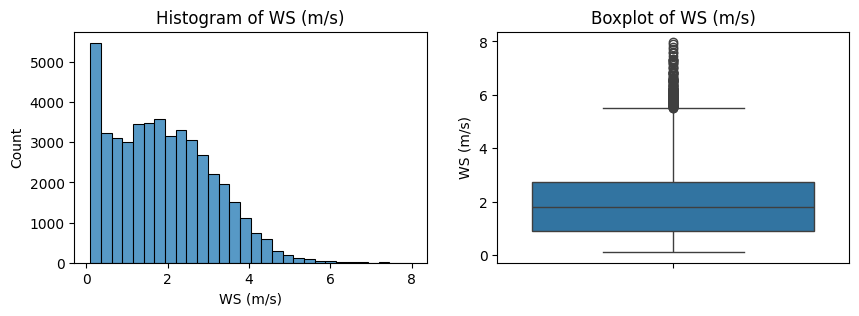

skewness: 0.5570399750015516
kurtosis: -0.1368420211952155


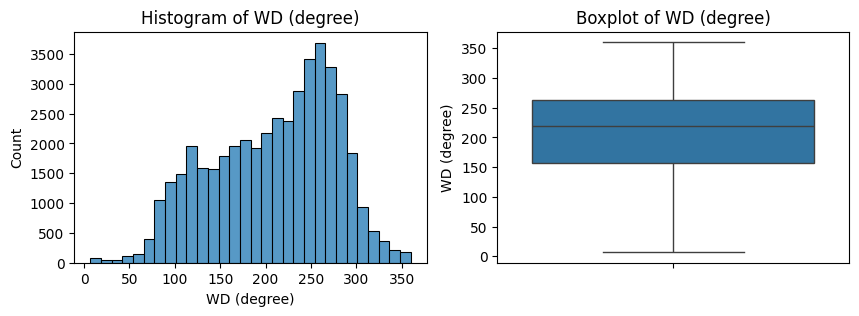

skewness: -0.34911852741540333
kurtosis: -0.7480644274386905


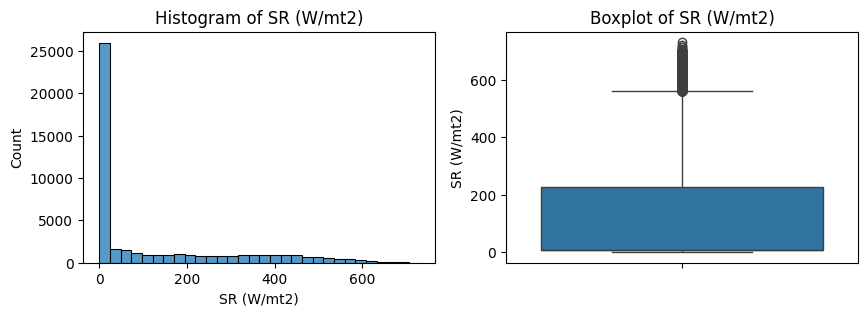

skewness: 1.2658550457078357
kurtosis: 0.3000403315050213


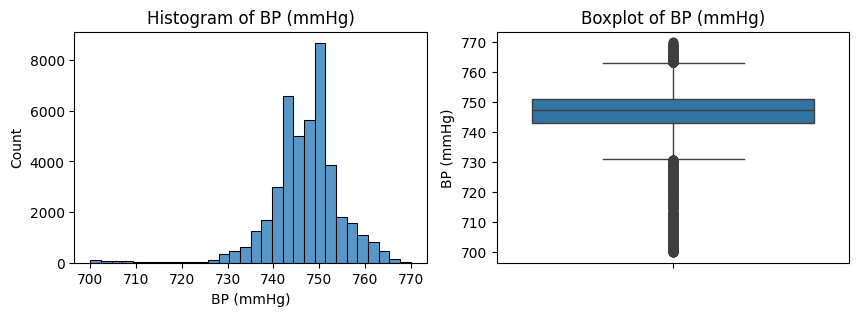

skewness: -1.2407614524936506
kurtosis: 6.11967758495874


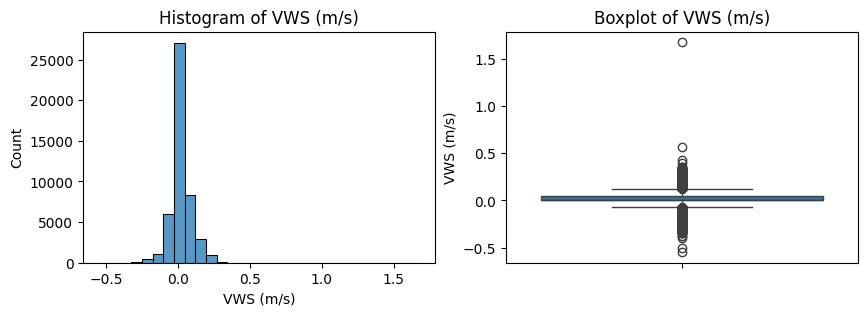

skewness: 0.36516854095996243
kurtosis: 8.734654849669555


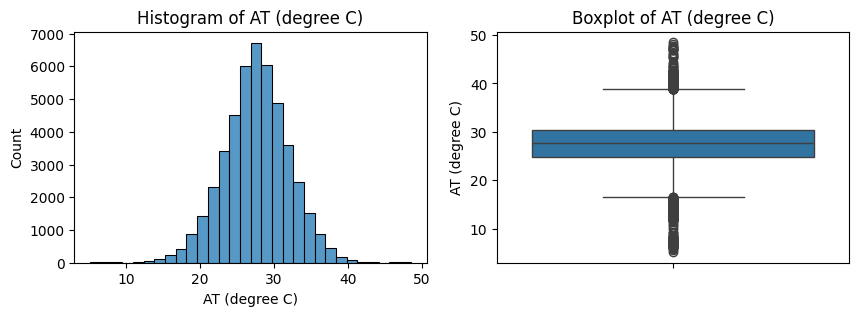

skewness: -0.14990869659051165
kurtosis: 0.7565053084001243


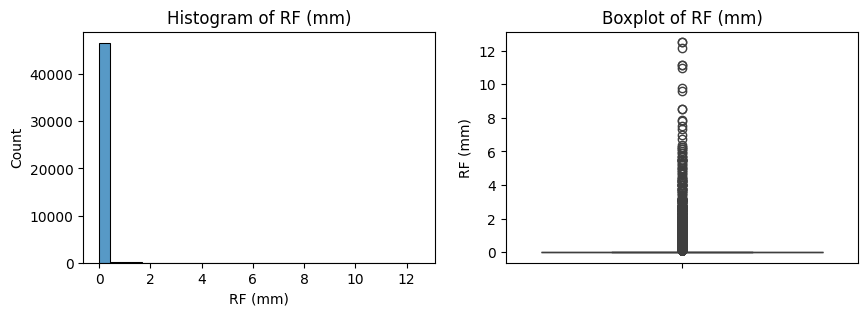

skewness: 22.378910166308632
kurtosis: 662.5156496274642


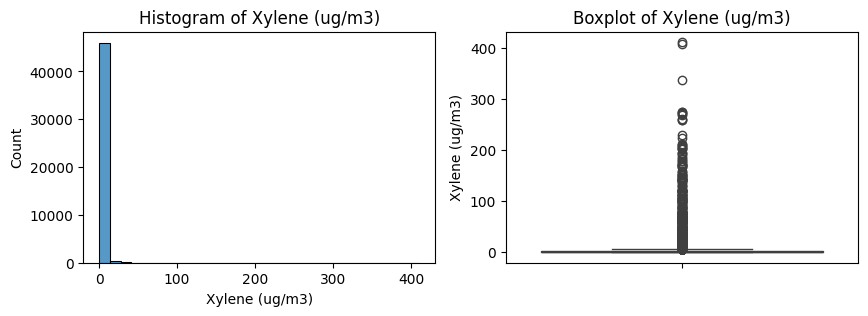

skewness: 20.243137661715526
kurtosis: 563.492816302317


In [ ]:
def look_outliers_distribution(df, numerical):
    for col in numerical:
        plt.figure(figsize=(10,3))

        plt.subplot(1,2,1) 
        sns.histplot(df[col], bins=30)
        plt.title(f'Histogram of {col}')

        plt.subplot(1,2,2) 
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')

        plt.show()

        print(f'skewness: {df[col].skew()}')
        print(f'kurtosis: {df[col].kurt()}')


look_outliers_distribution(df[num_cols], num_cols)

Outlier bisa dilihat dari boxplot di sebelah kanan. Sedangkan histogram di sebelah kiri menunjukkan bahwa kebanyakan variabel memiliki distribusi yang skewed.

### analisis korelasi

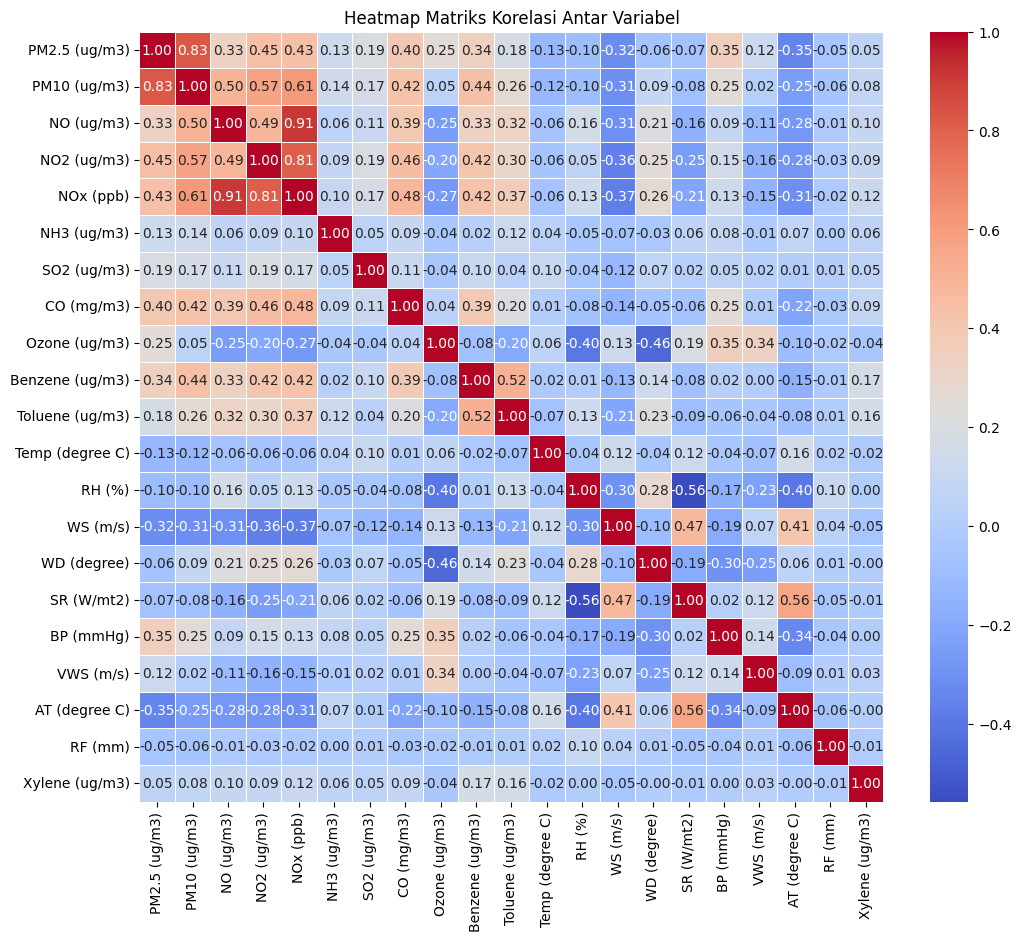

In [112]:
correlation_matrix = df[num_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Matriks Korelasi Antar Variabel')
plt.show()

Melalui heatmap, kita bisa melihat hubungan linear antara berbagai parameter kualitas udara, suhu, kelembaban, dan faktor lingkungan lainnya.

Korelasi Kuat (>=0.7 atau <=-0.7):
- NOx memiliki korelasi sangat kuat dengan NO (0.91) dan NO2 (0.81), menunjukkan hubungan linier yang erat antara polutan nitrogen.
- PM2.5 dan PM10 berkorelasi negatif kuat (-0.83), yang mungkin menandakan sumber atau pola emisi yang berbeda.

Korelasi Sedang (0.3–0.69 atau -0.3–-0.69):
- CO berkorelasi sedang dengan NO2 (0.46) dan NOx (0.48), mengindikasikan sumber polusi yang mungkin terkait (misalnya, kendaraan bermotor).
- RH (Kelembaban) dan SR (Radiasi Matahari) berkorelasi positif (0.56), mungkin karena pengaruh cuaca terhadap radiasi.
- Ozone berkorelasi positif dengan WD (Arah Angin) (0.46) dan RH (0.40), menunjukkan peran faktor meteorologi dalam pembentukan ozon.

Korelasi Lemah (<0.3 atau >-0.3):
- NH3 dan RF (Curah Hujan) hampir tidak berkorelasi dengan variabel lain (nilai mendekati 0), menandakan sumber atau dampak yang independen.
- Xylene juga menunjukkan korelasi sangat lemah dengan sebagian besar variabel.

Kesimpulan:\
Korelasi terkuat terjadi antar polutan nitrogen (NO, NO2, NOx), sedangkan faktor meteorologi seperti RH, SR, dan WS saling terkait. Beberapa polutan seperti NH3 dan xylene kurang dipengaruhi oleh variabel lain.

### split df menjadi training, validation, dan testing sets

In [113]:
total_size = len(df)
train_size = int(total_size * 0.8)
val_size = int(total_size * 0.1)
test_size = total_size - train_size - val_size

train_df = df[0:train_size]
val_df = df[train_size : train_size + val_size]
test_df = df[train_size + val_size : ]

print(f"Training: {len(train_df)} ({len(train_df)/total_size:.2%})")
print(f"Validation: {len(val_df)} ({len(val_df)/total_size:.2%})")
print(f"Testing: {len(test_df)} ({len(test_df)/total_size:.2%})")

Training: 40320 (80.00%)
Validation: 5040 (10.00%)
Testing: 5040 (10.00%)


### imputation untuk null values

In [114]:
#interpolation -> training set
train_df = train_df.interpolate(method='linear', limit_direction='both')

#ffil & bfil -> val & test
val_df = val_df.fillna(method='ffill').fillna(method='bfill')
test_df = test_df.fillna(method='ffill').fillna(method='bfill')

/tmp/ipython-input-114-2823203019.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  val_df = val_df.fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-114-2823203019.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_df = test_df.fillna(method='ffill').fillna(method='bfill')


### scaling menggunakan Robust Scaler

In [ ]:
num_inputs = num_cols.copy()
num_inputs.remove('AT (degree C)')

In [117]:
#numerik
scaler = RobustScaler()
scaler.fit(train_df[num_inputs])

train_scaled_numerical = scaler.transform(train_df[num_inputs])
val_scaled_numerical = scaler.transform(val_df[num_inputs])
test_scaled_numerical = scaler.transform(test_df[num_inputs])

In [118]:
#y
y_scaler = RobustScaler()
y_scaler.fit(train_df[['AT (degree C)']])

y_train_scaled = y_scaler.transform(train_df[['AT (degree C)']]).flatten()
y_val_scaled = y_scaler.transform(val_df[['AT (degree C)']]).flatten()
y_test_scaled = y_scaler.transform(test_df[['AT (degree C)']]).flatten()

In [121]:
train_inputs = train_scaled_numerical
val_inputs = val_scaled_numerical
test_inputs = test_scaled_numerical

### buat sequence

In [123]:
def create_sequences(data_array_input, data_array_target, look_back=5, predict_ahead=1):
    X, y = [], []
    for i in range(len(data_array_input) - look_back - predict_ahead + 1):
        X.append(data_array_input[i : (i + look_back), :])
        y.append(data_array_target[i + look_back + predict_ahead - 1])
    return np.array(X), np.array(y)

look_back_hours = 5
predict_ahead_hours = 1

X_train, y_train_seq = create_sequences(train_inputs, y_train_scaled, look_back_hours, predict_ahead_hours)
X_val, y_val_seq = create_sequences(val_inputs, y_val_scaled, look_back_hours, predict_ahead_hours)
X_test, y_test_seq = create_sequences(test_inputs, y_test_scaled, look_back_hours, predict_ahead_hours)

In [ ]:
target_col = 'AT (degree C)'
y_test_eval = test_df[target_col].iloc[look_back_hours + predict_ahead_hours - 1:].values

assert len(y_test_eval) == len(y_test_seq)

In [126]:
num_features_input = X_train.shape[2]

print(f"Bentuk X_train: {X_train.shape} (samples, time_steps={look_back_hours}, features={num_features_input})")
print(f"Bentuk y_train (sequence target): {y_train_seq.shape} (samples,)")
print(f"Bentuk X_val:   {X_val.shape}")
print(f"Bentuk y_val (sequence target):   {y_val_seq.shape}")
print(f"Bentuk X_test:  {X_test.shape}")
print(f"Bentuk y_test (sequence target):  {y_test_seq.shape}")
print(f"Jumlah fitur input yang sebenarnya (num_features_input): {num_features_input}")

Bentuk X_train: (40315, 5, 20) (samples, time_steps=5, features=20)
Bentuk y_train (sequence target): (40315,) (samples,)
Bentuk X_val:   (5035, 5, 20)
Bentuk y_val (sequence target):   (5035,)
Bentuk X_test:  (5035, 5, 20)
Bentuk y_test (sequence target):  (5035,)
Jumlah fitur input yang sebenarnya (num_features_input): 20


## modelling

### baseline

In [127]:
model_2 = Sequential([
    LSTM(units=10, activation='relu', input_shape=(look_back_hours, num_features_input)),
    Dense(units=1, activation='linear')
])

model_2.compile(optimizer='rmsprop', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [128]:
model_2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 10)             │         1,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,251 (4.89 KB)

 Trainable params: 1,251 (4.89 KB)

 Non-trainable params: 0 (0.00 B)

In [129]:
history_model_2 = model_2.fit(
    X_train, y_train_seq,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val_seq),
    callbacks=[
                 keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
                 keras.callbacks.ModelCheckpoint('model_2.keras', save_best_only=True),
                 keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
             ],
    verbose=1
)

Epoch 1/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.5304 - val_loss: 0.2371 - learning_rate: 0.0010
Epoch 2/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1810 - val_loss: 0.2118 - learning_rate: 0.0010
Epoch 3/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1541 - val_loss: 0.2020 - learning_rate: 0.0010
Epoch 4/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1411 - val_loss: 0.1853 - learning_rate: 0.0010
Epoch 5/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1350 - val_loss: 0.1888 - learning_rate: 0.0010
Epoch 6/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1288 - val_loss: 0.1864 - learning_rate: 0.0010
Epoch 7/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1247 - val_loss: 0.1661 - learning_rate: 0.0010
Epoch 8/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1186 - val_loss: 0.1973 - learning_rate: 0.0010
Epoch 9/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1167 - val_loss: 0.1534 - learning_rate:

Training dilakukan dengan 50 epochs dan batch_size 32. Diberikan callbacks untuk optimasi training yang akan menghentikan pelatihan jika val_loss tidak membaik dalam 5 epoch (EarlyStopping), menyimpan model terbaik (save_best_only=True) ke file model_2.keras (ModelCheckpoint), dan mengurangi learning rate (×0.5) jika val_loss tidak membaik dalam 5 epoch (ReduceLROnPlateau).

Hasil training:
- Loss (Training): Turun signifikan dari 0.5304 (epoch 1) ke 0.0976 (epoch 18), menunjukkan model belajar pola data dengan baik.
- Val Loss (Validasi): Fluktuatif di sekitar 0.15–0.20, dengan nilai terendah 0.1524 (epoch 13).
- Pelatihan berhenti di epoch 18 karena val_loss tidak membaik selama 5 epoch berturut-turut.

Kesimpulan:\
Training berhasil mengurangi loss, tapi val_loss masih fluktuatif.

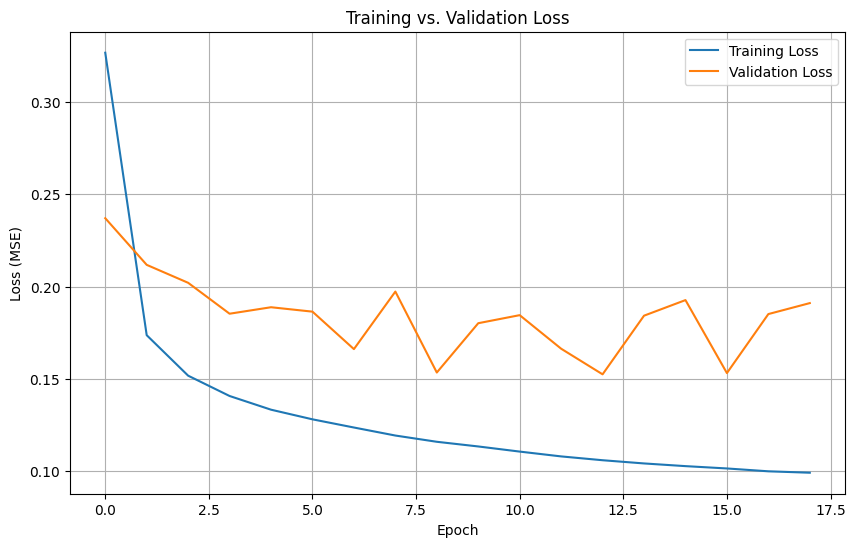

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history_model_2.history['loss'], label='Training Loss')
plt.plot(history_model_2.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

Dari plot bisa terlihat bahwa hasil training menunjukkan adanya overfitting. Meskipun tidak terlalu signifikan karena selisih loss dan val_loss tidak terlalu lebar, tetapi gap antara training loss dan validation loss menandakan bahwa model mulai menghafal data yang dilatih.

### modified model

In [133]:
model_8 = Sequential([
    LSTM(units=8, activation='relu', input_shape=(look_back_hours, num_features_input)),
    Dense(units=1, activation='linear')
])

model_8.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Setelah melakukan tuning terhadap baseline model menggunakan keras tuner, saya menemukan bahwa semakin besar jumlah units dan semakin banyak layer pada model malah menghasilkan overfitting parah.

Oleh karena itu, pada modified model ini, saya hanya mengubah jumlah units LSTM menjadi 8.

In [134]:
model_8.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 8)              │           928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 937 (3.66 KB)

 Trainable params: 937 (3.66 KB)

 Non-trainable params: 0 (0.00 B)

In [135]:
history_model_8 = model_8.fit(
    X_train, y_train_seq,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val_seq),
    callbacks=[
                 keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
                 keras.callbacks.ModelCheckpoint('model_8.keras', save_best_only=True),
                 keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
             ],
    verbose=1
)

Epoch 1/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.7432 - val_loss: 0.3032 - learning_rate: 0.0010
Epoch 2/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2238 - val_loss: 0.2415 - learning_rate: 0.0010
Epoch 3/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1816 - val_loss: 0.2268 - learning_rate: 0.0010
Epoch 4/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1632 - val_loss: 0.1998 - learning_rate: 0.0010
Epoch 5/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1482 - val_loss: 0.1762 - learning_rate: 0.0010
Epoch 6/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1420 - val_loss: 0.1835 - learning_rate: 0.0010
Epoch 7/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1331 - val_loss: 0.1852 - learning_rate: 0.0010
Epoch 8/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1281 - val_loss: 0.1686 - learning_rate: 0.0010
Epoch 9/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1271 - val_loss: 0.1657 - learning_rate:

Training dilakukan dengan 50 epochs dan batch_size 32. Diberikan callbacks untuk optimasi training yang akan menghentikan pelatihan jika val_loss tidak membaik dalam 5 epoch (EarlyStopping), menyimpan model terbaik (save_best_only=True) ke file model_2.keras (ModelCheckpoint), dan mengurangi learning rate (×0.5) jika val_loss tidak membaik dalam 5 epoch (ReduceLROnPlateau).

Hasil training:
- Loss (Training): Turun signifikan dari 0.7432  ke  0.1068, menunjukkan model belajar pola data dengan baik.
- Val Loss (Validasi): Fluktuatif di sekitar 0.3032–0.1545 (epoch 14), tetapi ada fluktuasi setelahnya.
- Mulai epoch 10 ke atas, train loss tetap turun tapi val loss tidak konsisten turun.

Kesimpulan:\
Model menunjukkan progres baik awalnya, namun setelah epoch 14, mulai terlihat adanya overfitting ringan.

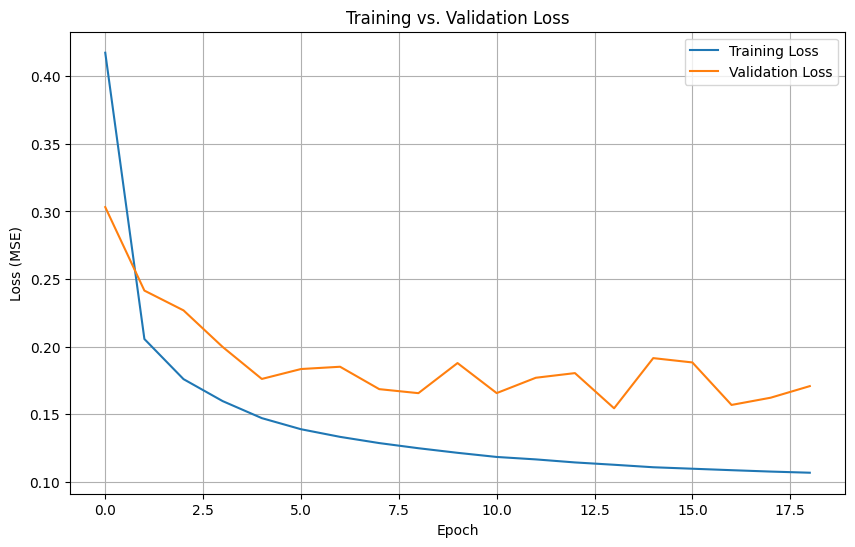

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history_model_8.history['loss'], label='Training Loss')
plt.plot(history_model_8.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

Dari plot bisa terlihat bahwa hasil training menunjukkan adanya overfitting ringan. Meskipun gap antara training loss dan validation loss tidak selebar model baseline, tetapi val_loss yang berfluktiasi naik setelah epoch 10 menandakan bahwa model juga mulai menghafal data yang dilatih.

## evaluasi

#### baseline model

In [ ]:
y_pred_model_2 = model_2.predict(X_test)
y_pred_model_2 = y_pred_model_2.reshape(-1, 1)
y_pred_model_2_original = y_scaler.inverse_transform(y_pred_model_2).flatten()

mae_model_2 = mean_absolute_error(y_test_eval, y_pred_model_2_original)
mse_model_2 = mean_squared_error(y_test_eval, y_pred_model_2_original)
r2_model_2 = r2_score(y_test_eval, y_pred_model_2_original)
print(f"  MAE: {mae_model_2:.4f}")
print(f"  MSE: {mse_model_2:.4f}")
print(f"  R2 Score: {r2_model_2:.4f}")

158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
  MAE: 2.0900
  MSE: 6.8825
  R2 Score: 0.5773


Rata-rata kesalahan prediksi model adalah kurang lebih 2.09 derajat C dari nilai AT sebenarnya. Model dapat menjelaskan 57.73% variasi dalam data target (AT). Hasil ini belum optimal.

#### modified model

In [137]:
y_pred_model_8 = model_8.predict(X_test)
y_pred_model_8_original = y_scaler.inverse_transform(y_pred_model_8).flatten()

mae_model_8 = mean_absolute_error(y_test_eval, y_pred_model_8_original)
mse_model_8 = mean_squared_error(y_test_eval, y_pred_model_8_original)
r2_model_8 = r2_score(y_test_eval, y_pred_model_8_original)
print(f"  MAE: {mae_model_8:.4f}")
print(f"  MSE: {mse_model_8:.4f}")
print(f"  R2 Score: {r2_model_8:.4f}")

158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
  MAE: 2.1650
  MSE: 7.2551
  R2 Score: 0.5544


Rata-rata kesalahan prediksi model adalah kurang lebih 2.165 derajat C dari nilai AT sebenarnya. Model dapat menjelaskan 55.44% variasi dalam data target (AT). Hasil ini belum optimal.

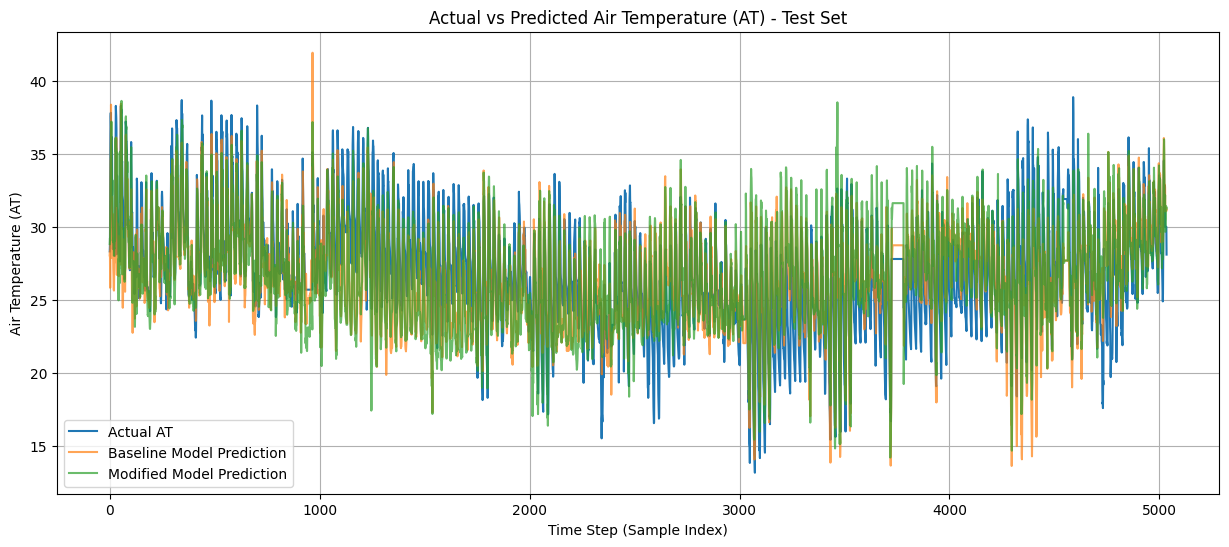

In [145]:
plt.figure(figsize=(15, 6))
plt.plot(y_test_eval, label='Actual AT')
plt.plot(y_pred_model_2_original, label='Baseline Model Prediction', alpha=0.7)
plt.plot(y_pred_model_8_original, label='Modified Model Prediction', alpha=0.7)
plt.title('Actual vs Predicted Air Temperature (AT) - Test Set')
plt.xlabel('Time Step (Sample Index)')
plt.ylabel('Air Temperature (AT)')
plt.legend()
plt.grid(True)
plt.show()

Jika dilihat dari grafik:
- Baseline model memiliki gap lebih besar dengan data aktual dan terlihat deviasi yang cukup melenceng.
- Modified model lebih mengikuti pola data aktual meskipun tetap ada deviasi.

## Kesimpulan

Berdasarkan hasil skor metrics MAE, MSE, dan R2, dapat disimpulkan bahwa baseline model menghasilkan kesalahan prediksi yang lebih kecil dibandingkan modified model. Baseline model juga dapat menjelaskan lebih banyak variasi dalam data target (AT). Meskipun demikian, dari grafik train_loss dan val_loss, modified model menunjukkan overfitting yang lebih ringan jika dibandingkan dengan baseline model. Dan jika dilihat dari grafik hasil prediksi kedua model yang dibandingkan dengan data aktual, hasil prediksi modified model terlihat lebih mengikuti pola data aktual meskipun tetap terdapat deviasi.

## Jawaban soal bonus
Ya, prolem ini sangat cocok untuk pendekatan multivariate time series. Beberapa alasannya yaitu sebagai berikut.

1. Variabel lain berkorelasi dengan target (AT) dan saling berkorelasi antara satu dengan yang lain juga. Misalnya jika dilihat dari correlation plot, terdapat korelasi yang kuat antara AT dengan RH, WS, SR, dan BP. Variabel inputnya juga saling berkorelasi, misalnya NOx, NO2, dan NO berkorelasi tinggi. Hal ini menunjukkan bahwa hubungan kimiawi mungkin mempengaruhi AT.

2. Variabel input memiliki pola temporal. Data time series multivariate mensyaratkan bahwa semua variabel input memiliki timestamp yang sama dan pola perubahan waktu yang relevan. Data dalam datset ini sudah tercatat dalam interval waktu seragam (per jam) sehingga strukturnya cocok untuk multivariate.

3. Ada beberapa variabel yang mungkin memiliki pengaruh yang sama terhadap suatu fenomena. Misalnya, SR (radiasi matahari) dan RH (kelembaban) mempengaruhi AT dan NOx dan CO mempengaruhi suhu.